In [473]:
COLLECT_TS = "2024-02-28T13:43:59.532127233+00:00"

In [250]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("bmh")

from IPython.display import display

In [265]:
%load_ext autoreload
%autoreload 2
    
import transform

In [251]:
def sigmoid(x, alpha, beta): 
    return 1/(1 + np.exp(- alpha * (x + beta)))

In [474]:
metric_files = transform.recursive_dfs(f"../metric-collector/data/{COLLECT_TS}")

In [529]:
metrics = transform.metric_files_to_df(metric_files)
metrics

,jbd2/nvme0n1p2-8/985/schedstat/epoch_ms,jbd2/nvme0n1p2-8/985/schedstat/runtime,jbd2/nvme0n1p2-8/985/schedstat/rq_time,jbd2/nvme0n1p2-8/985/schedstat/run_periods,epoch_s,jbd2/nvme0n1p2-8/985/schedstat/runtime_rate,jbd2/nvme0n1p2-8/985/schedstat/rq_rate,jbd2/nvme0n1p2-8/985/sched/epoch_ms,jbd2/nvme0n1p2-8/985/sched/runtime,jbd2/nvme0n1p2-8/985/sched/rq_time,...,example-applica/381148/sched/iowait_rate,example-applica/381148/sched/block_rate,example-applica/381148/sched/sleep_rate,example-applica/381148/sched/runnable,example-applica/381148/sched/active_rate,example-applica/381148/sched/[runnable/active],example-applica/381148/sched/[running/active],example-applica/381148/sched/[rq/active],example-applica/381148/sched/[iowait/active],example-applica/381148/sched/[block/active]
0,1.709128e+12,436907.0,188190.0,37.0,1709127841,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.709128e+12,436907.0,188190.0,37.0,1709127842,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.709128e+12,436907.0,188190.0,37.0,1709127843,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,9.173712,0.000032,0.000032,1.0,1.0,0.0,0.0,0.0
3,1.709128e+12,436907.0,188190.0,37.0,1709127844,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.960274,0.000047,0.000047,1.0,1.0,0.0,0.0,0.0
4,1.709128e+12,436907.0,188190.0,37.0,1709127845,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,1.440688,0.000078,0.000078,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.709128e+12,436907.0,188190.0,37.0,1709127982,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,1.709128e+12,436907.0,188190.0,37.0,1709127983,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,1709127860,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,1709127886,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [491]:
response_times = transform.load_response_times("../data/response_time.csv")
response_times

,end_ts,duration_ms,end_epoch_s,duration_s,start_epoch_s
0,2024-02-28T13:44:03.165965427+00:00,289,1709127843,0.289,1709127842
1,2024-02-28T13:44:03.661608203+00:00,287,1709127843,0.287,1709127842
2,2024-02-28T13:44:04.164121323+00:00,288,1709127844,0.288,1709127843
3,2024-02-28T13:44:04.663499828+00:00,287,1709127844,0.287,1709127843
4,2024-02-28T13:44:05.165198080+00:00,288,1709127845,0.288,1709127844
...,...,...,...,...,...
235,2024-02-28T13:46:18.130923107+00:00,5166,1709127978,5.166,1709127972
236,2024-02-28T13:46:18.412449816+00:00,4446,1709127978,4.446,1709127973
237,2024-02-28T13:46:18.636149253+00:00,3672,1709127978,3.672,1709127974
238,2024-02-28T13:46:18.922436030+00:00,2953,1709127978,2.953,1709127975


In [492]:
response_times = transform.response_time_percentiles(response_times)
response_times

,epoch_s,percentile_90
0,1709127842,0.2888
1,1709127843,0.2887
2,1709127844,0.2880
3,1709127845,0.2880
4,1709127846,0.2887
...,...,...
69,1709127972,8.5630
70,1709127973,8.6030
71,1709127974,8.6462
72,1709127975,8.6894


In [530]:
metrics = pd.merge(metrics, response_times, on="epoch_s", how="outer")
metrics["relative_epoch_s"] = metrics["epoch_s"] - metrics["epoch_s"].min()
metrics

,jbd2/nvme0n1p2-8/985/schedstat/epoch_ms,jbd2/nvme0n1p2-8/985/schedstat/runtime,jbd2/nvme0n1p2-8/985/schedstat/rq_time,jbd2/nvme0n1p2-8/985/schedstat/run_periods,epoch_s,jbd2/nvme0n1p2-8/985/schedstat/runtime_rate,jbd2/nvme0n1p2-8/985/schedstat/rq_rate,jbd2/nvme0n1p2-8/985/sched/epoch_ms,jbd2/nvme0n1p2-8/985/sched/runtime,jbd2/nvme0n1p2-8/985/sched/rq_time,...,example-applica/381148/sched/sleep_rate,example-applica/381148/sched/runnable,example-applica/381148/sched/active_rate,example-applica/381148/sched/[runnable/active],example-applica/381148/sched/[running/active],example-applica/381148/sched/[rq/active],example-applica/381148/sched/[iowait/active],example-applica/381148/sched/[block/active],percentile_90,relative_epoch_s
0,1.709128e+12,436907.0,188190.0,37.0,1709127841,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.709128e+12,436907.0,188190.0,37.0,1709127842,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2888,1
2,1.709128e+12,436907.0,188190.0,37.0,1709127843,0.0,0.0,NaN,NaN,NaN,...,9.173712,0.000032,0.000032,1.0,1.0,0.0,0.0,0.0,0.2887,2
3,1.709128e+12,436907.0,188190.0,37.0,1709127844,0.0,0.0,NaN,NaN,NaN,...,0.960274,0.000047,0.000047,1.0,1.0,0.0,0.0,0.0,0.2880,3
4,1.709128e+12,436907.0,188190.0,37.0,1709127845,0.0,0.0,NaN,NaN,NaN,...,1.440688,0.000078,0.000078,1.0,1.0,0.0,0.0,0.0,0.2880,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.709128e+12,436907.0,188190.0,37.0,1709127983,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
138,NaN,NaN,NaN,NaN,1709127860,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6339,19
139,NaN,NaN,NaN,NaN,1709127886,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
140,NaN,NaN,NaN,NaN,1709127961,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5020,120


# Plots

## Request Structure

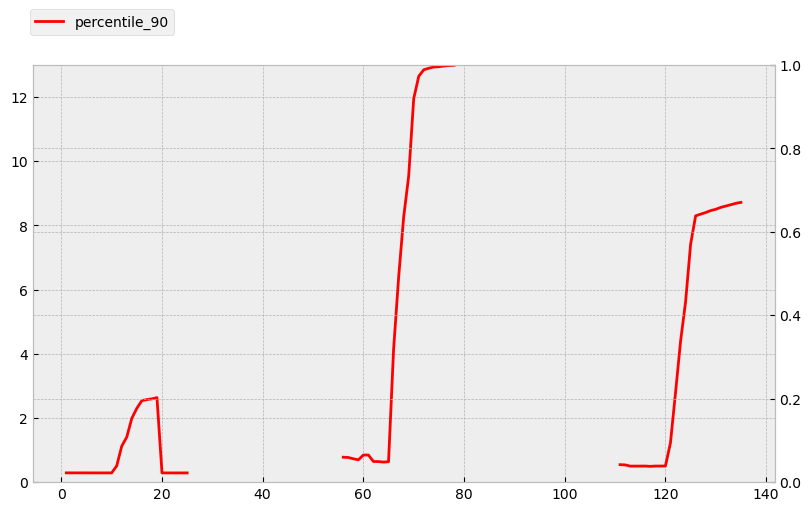

In [515]:
col_filter = metrics.filter(
    regex="(relative_epoch_s|percentile_90)"
).columns
metrics_view = metrics.loc[metrics["epoch_s"].isna() == False, col_filter]
metrics_view = metrics_view.sort_values(by="relative_epoch_s")

fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
ax2 = host.twinx()

host.plot(metrics_view["relative_epoch_s"], metrics_view["percentile_90"], color="red", label="percentile_90")
host.set_ylim(0, 13)
host.legend(bbox_to_anchor=(0.2, 1.15))

## CPU requests

The following figure illustrates the metrics that manifest themselves throughout the CPU load test. Given the way the application is designed, there are 2 threads that process each request sent via http.

For this reason, to determine when the CPU is saturated, we monitor the active_time of all threads in the example application and evaluate how much of the active time is accounted for by the runtime. To also account for scenarios where there might be CPU contention, we also include how much of a thread's active time is spent waiting on a runqueue.

The metrics included for the example application are: 

* `runnable`: This metric combines the runtime + rq_time.

For the cpu stress test, during the first period `runnable` presents a value between 0.2 and 0.4. On the second stage however, `runnable` increases to 1.0. `runnable` falls back down during the cooldown, and returns to 0. As shown in the figure, only the threads in the thread pool present any activity, while the thread that receives connections presents low values for `runnable` throughout the execution of the stress test. It is also important to highlight that `runnable` presents a significant difference between the first and the following scenarios, a good indicator that is a good metric to track for the scenario under analysis.

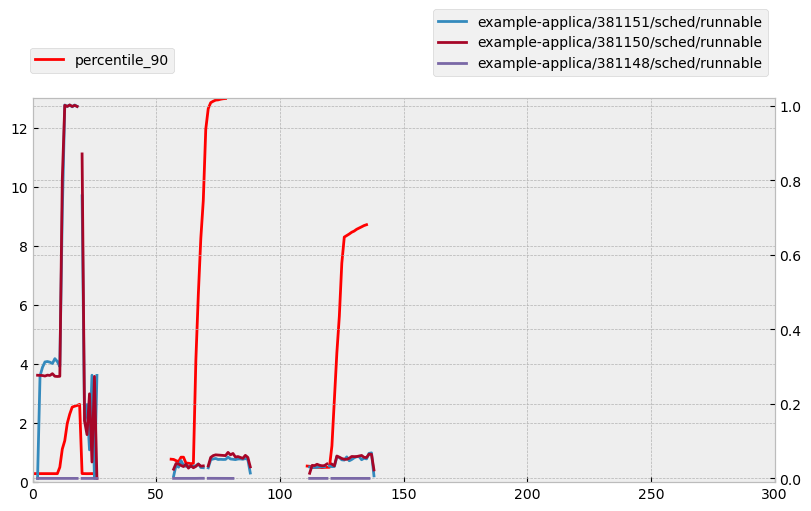

In [566]:
ALPHA=1
THREAD=".*"
# THREAD="(381150|381150)"

col_filter = metrics.filter(
    regex="("
              #f"example.*/.*{THREAD}.*/.*sched/\[runnable/active\]|"
              #f"example.*/.*{THREAD}.*/.*sched/runtime_rate|"
              #f"example.*/.*{THREAD}.*/.*sched/rq_rate|"
              #f"example.*/.*{THREAD}.*/.*sched/block_rate|"
              f"example.*/.*{THREAD}.*/.*sched/runnable|"
              #f"example.*/.*{THREAD}.*/.*sched/active_rate|"
              
              "percentile|"
              
              "relative_epoch_s"
          ")"
).columns
metrics_view = metrics.loc[metrics["epoch_s"].isna() == False, col_filter]
metrics_view = metrics_view.sort_values(by="relative_epoch_s")
Y = metrics_view.loc[:, ~metrics_view.columns.isin(["relative_epoch_s", "percentile_90"])]

fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
ax2 = host.twinx()

host.plot(metrics_view["relative_epoch_s"], metrics_view["percentile_90"], color="red", label="percentile_90")
host.set_ylim(0, 13)
host.legend(bbox_to_anchor=(0.2, 1.15))

for y in Y.columns:
    ax2.plot(metrics_view["relative_epoch_s"], Y[y], label=y, alpha=ALPHA)
ax2.legend(bbox_to_anchor=(1.0, 1.25))
ax2.set_ylim(-0.01, 1.02)

plt.xlim(0, 300)
plt.show()

## Disk Read

To force the application to interact with the disk while performing the filesystem operations, the read operation sets the `O_DIRECT` flag set, and the write sets the `O_SYNC` flag. In the first scenario, there is no disk activity and therefore we should not observe any difference in the disk related metrics. However, in the second scenario (the application is performing disk read ops), we should find that the application is now having to wait for disk IO. To fully distinguish between the read and write scenarios, we leverage additional metrics provided by the journaling kernel thread `jbd2`. 

As such, to determine the cause of saturation for both reads and writes, we require a combination of the following metrics: 

* example-application -> iowait
* jbd2 -> iowait

For reads, we expect high `example-application->iowait` and low `jbd2->iowait`. Whereas for writes, lower values of `example-application->iowait` and higher values of `jbd2->iowait` when compared to the read scenario. 

As shown in the figure, in the read scenario, `example-application->iowait` alone justifies the response time. However, while writing, `jbd2->iowait` also manifests itself. It is also important to note that neither of these metrics reveal activity throughout the first CPU scenario, proving to be good indicators of when there is synchronous disk activity.

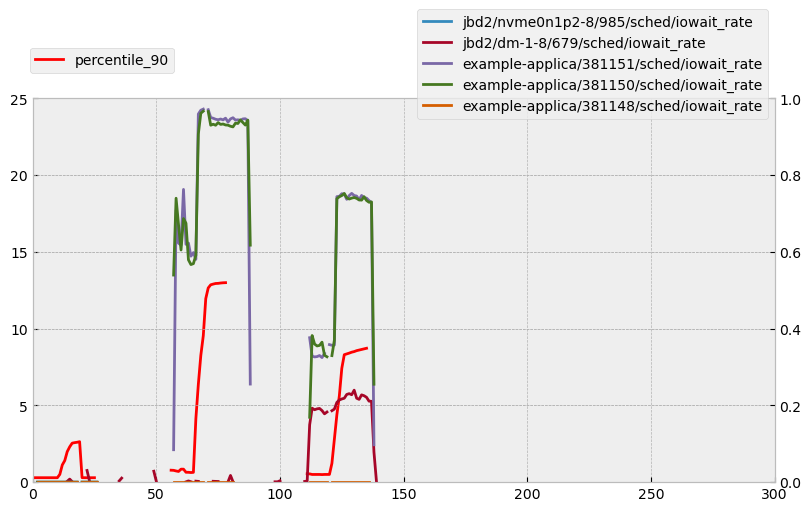

In [572]:
ALPHA=1

col_filter = metrics.filter(
    regex="("
              "(example-.*|jbd2).*"
              "sched/"
              "(iowait_rate)|"
              
              "percentile|"
          
               "relative_epoch_s"
          ")"
).columns
metrics_view = metrics.loc[metrics["epoch_s"].isna() == False, col_filter]
metrics_view = metrics_view.sort_values(by="relative_epoch_s")
Y = metrics_view.loc[:, ~metrics_view.columns.isin(["relative_epoch_s", "percentile_90"])]

fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
ax2 = host.twinx()

host.plot(metrics_view["relative_epoch_s"], metrics_view["percentile_90"], color="red", label="percentile_90")
host.set_ylim(0, 25)
host.legend(bbox_to_anchor=(0.2, 1.15))

for y in Y.columns:
    ax2.plot(metrics_view["relative_epoch_s"], Y[y], label=y, alpha=ALPHA)
ax2.legend(bbox_to_anchor=(1.0, 1.25))
ax2.set_ylim(0, 1)

plt.xlim(0, 300)
plt.show()